In [8]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
import itertools
import powerlaw
import math
import warnings
warnings.filterwarnings('ignore')

In [32]:
cType =  'kar'

### Funciones Auxiliares

In [ ]:
def PageRank_Sort (Gm, directed, weight, name_at):
    Gm_pagerank = Gm.pagerank(vertices=None, directed=directed, 
             damping=0.85, weights=weight, arpack_options=None, 
             implementation='prpack')
    Gm_r=[]
    for i in range(len(Gm.vs)):
        Gm_r.append((Gm_pagerank[i],Gm.vs[i][name_at]))

    Gm_r.sort(reverse=True)
    return Gm_r

In [24]:
def Betweenness_Centrality_Sort (Gm, directed, weight, name_at):
    Gm_betweenness = Gm.betweenness(vertices=None, directed=directed, cutoff=None, weights=weight)

    Gm_b=[]
    for i in range(len(Gm.vs)):
        Gm_b.append((Gm_betweenness[i],Gm.vs[i][name_at]))
    
    Gm_b.sort(reverse=True)
    return Gm_b

In [74]:
def Calcular_descriptivas(Gm, directed):
    
    Gm_strength = sum(Gm.strength(mode='all', loops=False, weights='weight'))
    if(directed == False): 
        Gm_strength = Gm_strength/2
    Gm_degree = Gm.ecount()
    Gm_density = Gm.density(loops=False)
    Gm_avg_shortest_path = Gm.average_path_length(directed=directed)
    Gm_total_vertices = Gm.vcount()
    Sending_nodes=len(Gm.vs.select(_outdegree_gt=0))/Gm_total_nodes*100
    Receiving_nodes = len(Gm.vs.select(_indegree_gt=0))/Gm_total_nodes*100
    Gm_tran = Gm.transitivity_undirected()
    Gm_lacc = Gm.transitivity_avglocal_undirected()
    tc= Gm.cliques(min=3,max=3)
    Gm_ntri = len(tc)

    tf=[]
    for i in range(len(Gm.vs)):
        n=0
        for t in tc:
            if i in t:
                n+=1
        tf.append(n)
    Gm_atri = np.mean(tf)
    
    G_properties = pd.DataFrame(
    {'Variable': ["Total vertices", 
                  "Sending nodes",
                  "Receiving nodes",
                  "Degree", 
                  "Connection density",
                  "Strength",
                  "Avg. path length",
                  'Number of triangles',
                  'Average triangles formed by an edge',
                  'Local average clustering coefficient',
                  'Transitivity'
                 ],
     'Value': [Gm_total_vertices,
               Sending_nodes, 
               Receiving_nodes,
               Gm_degree,
               Gm_density,
               Gm_strength,
               Gm_avg_shortest_path,
               Gm_ntri,
               Gm_atri,
               Gm_lacc,
               Gm_tran
              ],
    })

    return G_properties


In [77]:
def Calcular_relevancia (Gm, directed, weight, name_at):
    Gm_r = PageRank_Sort (Gm, directed, weight, name_at)
    Gm_b = Betweenness_Centrality_Sort (Gm, directed, weight, name_at)
    return Gm_b, Gm_r

In [81]:
def Calcular_medidas (Gm, directed, weight, name_at):
    G_properties = Calcular_descriptivas(Gm, directed)
    Gm_b, Gm_r = Calcular_relevancia(Gm, directed, weight, name_at)
    return G_properties, Gm_b, Gm_r

### Pruebas 

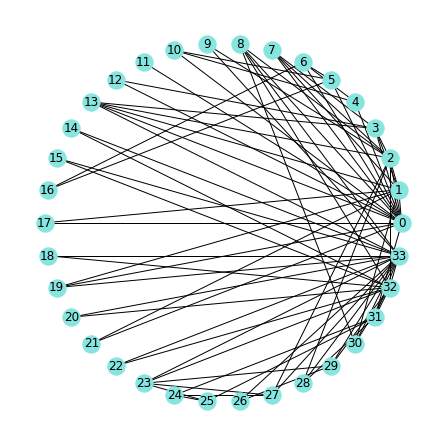

In [79]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()
    
plt.figure(3,figsize=(6,6)) 
nx.draw_circular(G, with_labels=True, node_color ='#87E5DF')

plt.show()

nEdges=G.number_of_edges()
nNodes=G.number_of_nodes()

Gm = ig.Graph.from_networkx(G)
directed=False
weight=None
name_at="_nx_name"

Gm.es['weight']=[i+1 for i in range(Gm.ecount())]

In [82]:
G_properties = Calcular_descriptivas(Gm, False)
G_properties

,Variable,Value
0,Total vertices,34.000000
1,Sending nodes,100.000000
2,Receiving nodes,100.000000
3,Degree,78.000000
4,Connection density,0.139037
5,Strength,3081.000000
6,Avg. path length,2.408200
7,Number of triangles,45.000000
8,Average triangles formed by an edge,3.970588
9,Local average clustering coefficient,0.587931


In [87]:
Gm_b, Gm_r = Calcular_relevancia (Gm, directed, weight, 
                                  name_at)

In [88]:
Gm_b[:5]

[(231.0714285714286, 0),
 (160.5515873015873, 33),
 (76.69047619047619, 32),
 (75.85079365079366, 2),
 (73.00952380952378, 31)]

In [89]:
Gm_r[:5]

[(0.1009191823326258, 33),
 (0.09699728538829475, 0),
 (0.0716932260057545, 32),
 (0.057078509488462034, 2),
 (0.05287692406114573, 1)]

In [90]:
G_properties, Gm_b, Gm_r = Calcular_medidas (Gm, directed,
                                             weight, name_at)

In [91]:
G_properties

,Variable,Value
0,Total vertices,34.000000
1,Sending nodes,100.000000
2,Receiving nodes,100.000000
3,Degree,78.000000
4,Connection density,0.139037
5,Strength,3081.000000
6,Avg. path length,2.408200
7,Number of triangles,45.000000
8,Average triangles formed by an edge,3.970588
9,Local average clustering coefficient,0.587931


In [92]:
Gm_b[:5]

[(231.0714285714286, 0),
 (160.5515873015873, 33),
 (76.69047619047619, 32),
 (75.85079365079366, 2),
 (73.00952380952378, 31)]

In [93]:
Gm_r[:5]

[(0.1009191823326258, 33),
 (0.09699728538829475, 0),
 (0.0716932260057545, 32),
 (0.057078509488462034, 2),
 (0.05287692406114573, 1)]